In [ ]:
#default_exp common.datablock

# Datablock
> The fastai documentation already has excellent examples of the Datablock API, you can find it [here](https://github.com/fastai/fastai2/blob/master/nbs/50_tutorial.datablock.ipynb). Because of that I'll focus on more peculiar use cases here.  
If you want a more detailed view take a look at [this](https://muellerzr.github.io/fastblog/datablock/2020/03/21/DataBlockAPI.html) blog post or at the second chapter of [fastbook](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) (scroll down to the *From data to DataLoaders* section).

## Required imports and common setup

In [ ]:
from fastai2.vision.all import *

In [ ]:
source = untar_data(URLs.PETS)/'images'
fns = get_image_files(source)

## Custom types

Check [this](http://dev.fast.ai/tutorial.siamese#Writing-your-custom-data-block) siamese datablock tutorial for how to create custom types.

Let's say we have a task where we want to predict the race of a pet. Normally we do this by just looking at an image of the pet, but let's say that for this task, we also have an additional information, the weight of the pet!  
How do we handle that?

In [ ]:
class ImageWeight(Tuple):
  @classmethod
  def create(cls, fnw): return cls(PILImage.create(fnw[0]), tensor(fnw[1]))
  def show(self, ctx=None, **kwargs): return show_image(self[0], title=str(self[1]), ctx=ctx, **kwargs)

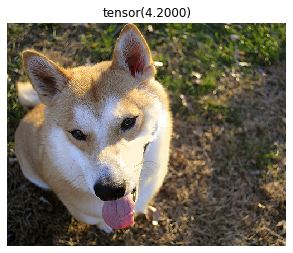

In [ ]:
im = ImageWeight.create([fns[0], 4.2]); im.show()

In [ ]:
def ImageWeightBlock(): return TransformBlock(type_tfms=ImageWeight.create, batch_tfms=IntToFloatTensor)

In [ ]:
def random_weight(): return np.random.uniform(1,8)

In [ ]:
def get_items(source):
  fns = get_image_files(source)
  return fns.map(lambda o: [o, random_weight()])

In [ ]:
dblock = DataBlock((ImageWeightBlock, CategoryBlock), get_items=get_items,
                   get_y=[[itemgetter(0), RegexLabeller(r'^.*\/(.*)_\d+.jpg$')]],
                   item_tfms=[Resize(128)])

In [ ]:
dls = dblock.dataloaders(source)

In [ ]:
@typedispatch
def show_batch(x:ImageWeight, y, samples, **kwargs):
  return show_batch[TensorImage](x, y, samples, **kwargs)

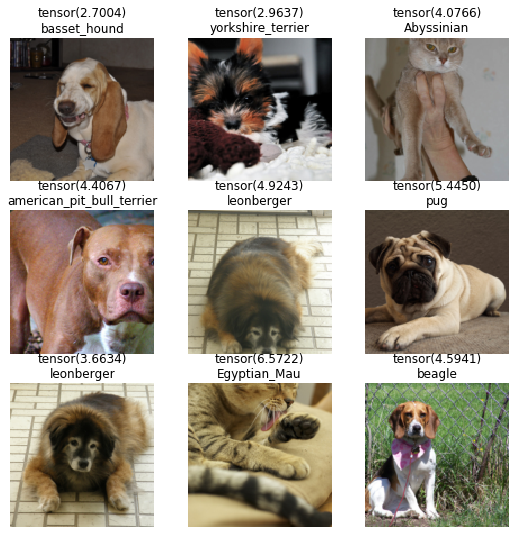

In [ ]:
dls.show_batch()

## Check transforms on a single item

In [ ]:
dblock = DataBlock((ImageBlock), get_items=get_image_files,
                  item_tfms=[RandomResizedCrop(128, min_scale=.3)])

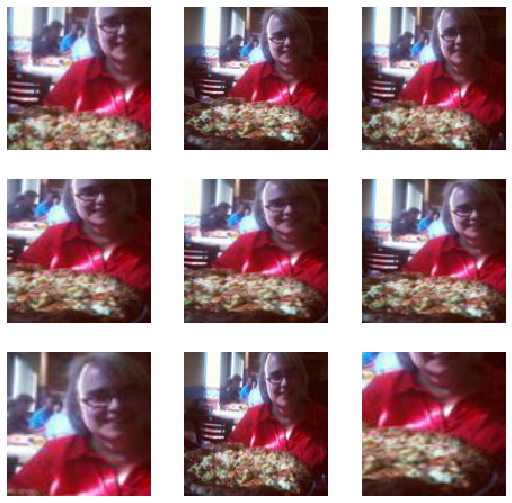

In [ ]:
dls = dblock.dataloaders(source)
dls.train.get_idxs = lambda: Inf.ones
dls.show_batch()